In [12]:
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
import utils.experiment_utils as exp 
import utils.plot_utils as plot

In [13]:
DATA_DIR = "results/Pendulum-v1_linearACresults"
# DATA_DIR = "/home/samuel/Documents/Actor-Expert/RLControl/results/Pendulum-v0_ForwardKLresults"
DATA_FILE = "data.pkl"
# DATA_FILE = "Pendulum-v0_ForwardKL_data_0_1_1.pkl"

# Get data
with open(os.path.join(DATA_DIR, DATA_FILE), "rb") as in_file:
    data = pickle.load(in_file)

In [14]:
hp_returns = exp.get_best_hp(data, "eval", after=0)
hp_returns[-20:]

((54, 544.8064000442381),
 (131, 556.0488825506619),
 (83, 563.2602390671016),
 (102, 564.8649957692526),
 (88, 576.2895601395444),
 (136, 588.003638356879),
 (111, 599.4135130014196),
 (31, 617.5047964811369),
 (137, 622.3835309478424),
 (112, 658.3581918360017),
 (103, 679.499653629486),
 (85, 681.3160894058025),
 (86, 695.1026319771449),
 (81, 742.3436007653992),
 (116, 749.3446437958784),
 (82, 749.5957961504707),
 (113, 769.1461515611886),
 (84, 807.0020996658282),
 (57, 849.7393355567687),
 (58, 851.752525548548))

(<Figure size 864x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Average Eval Return per Run with Standard Error'}, xlabel='Timesteps', ylabel='Average Return'>)

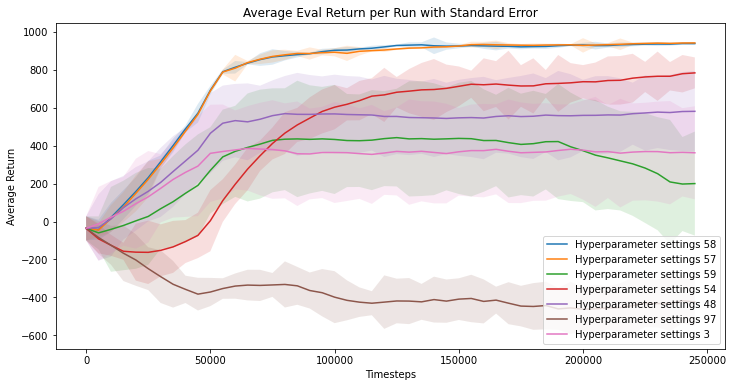

In [15]:
# Plot the mean return per run, smoothing over the passed 10,000 time steps
plot.plot_mean_with_stderr(data, "eval", [58, 57, 59, 54, 48, 97, 3], smooth_over=10)
# plot.plot_mean_with_stderr(data, "train", [0, 4, 2], smooth_over=10)

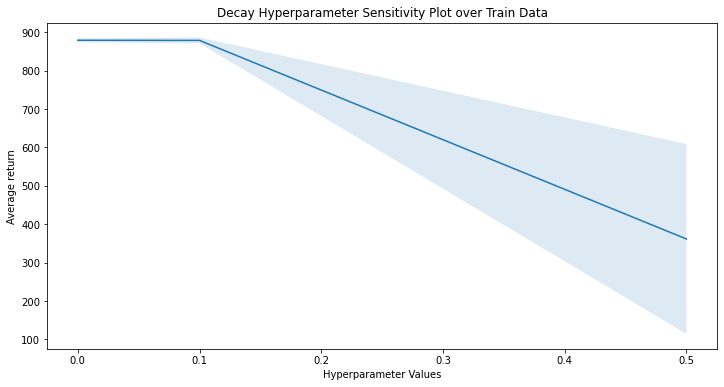

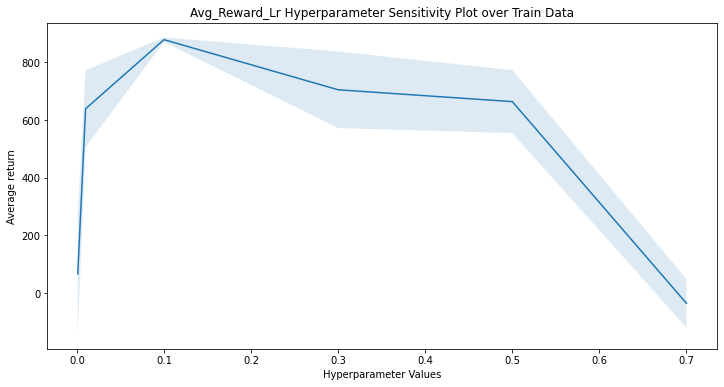

In [18]:
plot.hyperparam_sensitivity_plot_by_settings_index(data, "train", "decay", 58)
plot.hyperparam_sensitivity_plot_by_settings_index(data, "train", "avg_reward_lr", 58)